
# Investigate TMDb Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The used dataset to make investigation on it is TMDb Dataset 
> This data set contains information about 10,000 movies collected from The Movie Database (TMDb)
> including user ratings and revenue.
###### The questions that will be investigated are :
1. Describe the budget and the revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time?
2. what is the properties of the top 5 movies with the highest revenues?

In [1]:
# import libraries:pandas,numpy,matplotlib
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling

> In Data Wrangling:
 1. The dataset is loaded
 2. Explored to find out:
   >the null values, the summary statistics, incorrected data types, unuseful columns to be droped,...

### General Properties

In [2]:
# Load the data and print out a few lines
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#print the dataframe's info to know the null values of the column and the incorrected data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
#print dataframe statistics to see if something un reasonable
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#count the number of null values in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Text(0, 0.5, 'frequency')

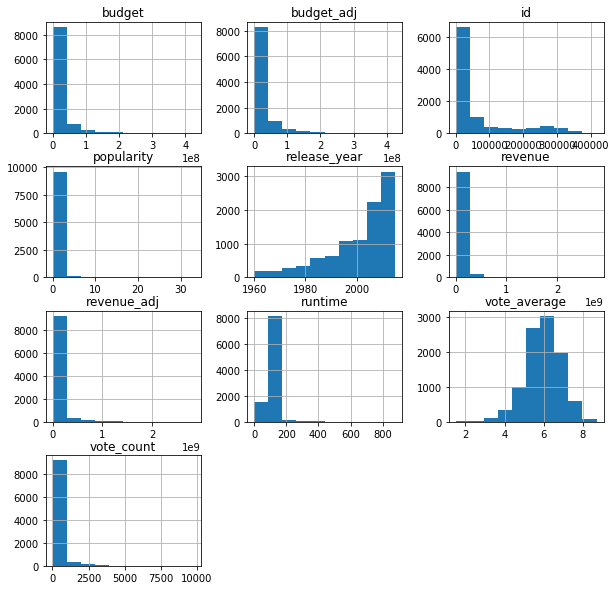

In [61]:
#explore the columns of the dataset as 1D using histogram
df.hist(figsize = (10, 10));
plt.ylabel("frequency")

>findings:
* The variables are not in a normal distribution
* most are skwed left like[release_year] 
* right like[budget,budget_adj,id,revenue_adj,vote_count]

### Data Cleaning 

* Drop columns "'imdb_id','homepage','tagline','keywords'"
* Drop missing values
* change datatype of release_year column to datetime
* remove dublicated row


In [17]:
#drop the columns that are not useful,and check by printing few lines
def drop_function(dropcolumns):
        """Function to drop columns in a list."""
        df.drop(dropcolumns, axis = 1, inplace = True, errors = 'ignore')
        
drop_function(['imdb_id','homepage','tagline','keywords'])        
df.dropna(inplace=True)
df.head()


,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
#drop duplicated, and then check
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
#check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9772 non-null   int64  
 1   popularity            9772 non-null   float64
 2   budget                9772 non-null   int64  
 3   revenue               9772 non-null   int64  
 4   original_title        9772 non-null   object 
 5   cast                  9772 non-null   object 
 6   director              9772 non-null   object 
 7   overview              9772 non-null   object 
 8   runtime               9772 non-null   int64  
 9   genres                9772 non-null   object 
 10  production_companies  9772 non-null   object 
 11  release_date          9772 non-null   object 
 12  vote_count            9772 non-null   int64  
 13  vote_average          9772 non-null   float64
 14  release_year          9772 non-null   int64  
 15  budget_adj          

In [23]:
#covert the release date datatype to datetime then check
def changedatatype(columnname,datatype):
    """Change the datatype of the column."""
    df[columnname]=df[columnname].astype(datatype)
        
changedatatype('release_date','datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9772 non-null   int64         
 1   popularity            9772 non-null   float64       
 2   budget                9772 non-null   int64         
 3   revenue               9772 non-null   int64         
 4   original_title        9772 non-null   object        
 5   cast                  9772 non-null   object        
 6   director              9772 non-null   object        
 7   overview              9772 non-null   object        
 8   runtime               9772 non-null   int64         
 9   genres                9772 non-null   object        
 10  production_companies  9772 non-null   object        
 11  release_date          9772 non-null   datetime64[ns]
 12  vote_count            9772 non-null   int64         
 13  vote_average     

In [25]:
#check all things is okay
df.head()


,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

> In this section we will answer the questions in the introduction section, and visualize them using histogram,scatter plots. 

### Describe the budget and the revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002493EEA0D88>],
      dtype=object)

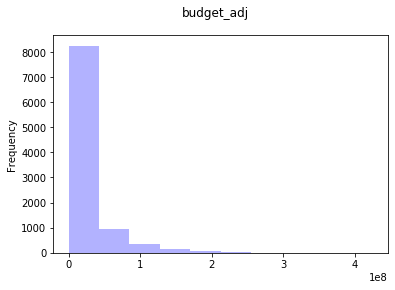

In [32]:
#explore the budget accounting for inflation over time using histogram
df['budget_adj'].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='budget_adj',color='blue',alpha=0.3)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002493EE16E08>],
      dtype=object)

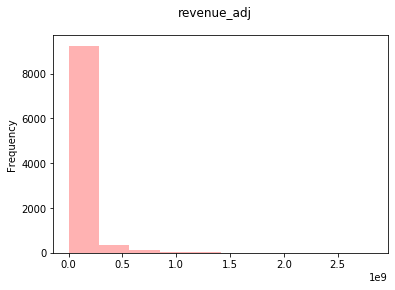

In [31]:
#explore the revenue accounting for inflation over time using histogram
df['revenue_adj'].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='revenue_adj',color='red',alpha=0.3)

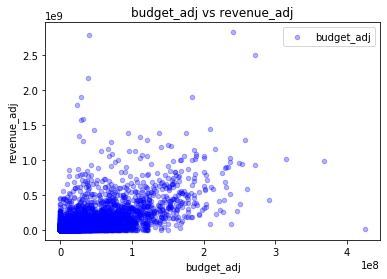

In [47]:
#plot the relation between budget_adj and revenue_adj
axes=df.plot(x='budget_adj',y='revenue_adj',color='blue',alpha=0.3,title='budget_adj vs revenue_adj',kind='scatter')
axes.legend(["budget_adj","revenue_adj"]);

>#### After exploring the budget and revenue in 1D and 2D views the answer is:
1. The data points in both are few.
2. The data in both does not follow the normal distribution.
3. The data in both is skewed to the right.
4. There is a positive correlation between budget and revenue therefore there is a relation between them.

### what is the properties of the top 5 movies with the highest revenues?

In [27]:
#make a dataframe with the sorted revenue column descending, then take the original data and put it in the new sorted dataframe,then print the top 5
def sort_desc(columnname):
    """Sort in another dataframe descendingly according to the column."""
    df_sorted = pd.DataFrame(df[columnname].sort_values(ascending=False))
    for i in df.columns:
        df_sorted[i] = df[i]
sort_desc('revenue')
df_sorted.head(5)

,revenue,id,popularity,budget,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,2781505847,19995,9.432768,237000000,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
3,2068178225,140607,11.173104,200000000,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,1845034188,597,4.355219,200000000,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,1519557910,24428,7.637767,220000000,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09
0,1513528810,135397,32.985763,150000000,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


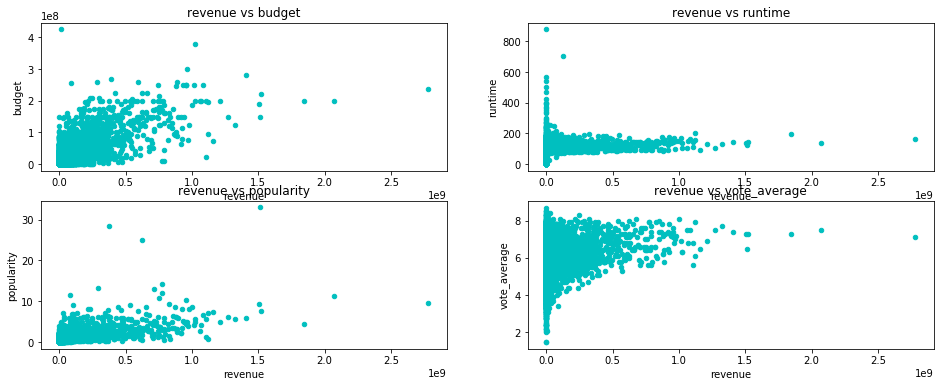

In [67]:
#represent the relation between revenue and budget,runtime,popularity,vote_average using scatter plot
fig, axes = plt.subplots(2,2,figsize = (16,6))
df_sorted.plot(x='revenue', y='budget',color='c',kind='scatter',ax=axes[0][0],title='revenue vs budget')
df_sorted.plot(x='revenue', y='runtime',color='c',kind='scatter',ax=axes[0][1],title='revenue vs runtime')
df_sorted.plot(x='revenue', y='popularity',color='c',kind='scatter',ax=axes[1][0],title='revenue vs popularity')
df_sorted.plot(x='revenue', y='vote_average',color='c',kind='scatter',ax=axes[1][1],title='revenue vs vote_average')

>#### From thoses representation we can find :
1. there is a positive correlation between revenue and budget,popularity.
2. there is a weak or may be no correlation between revenue and runtime,vote_average.

<a id='conclusions'></a>
## Conclusions

> After wrangling, exploring and cleaning the data, removing unuseful columns, missing values, duplicated, handle incorrect datatype.
###### my findings of the first quesion "Describe the budget and the revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time?" and how to represent this is :
* The data is skewed to the right
* The data points are few
* The data does not follow the normal distribution
* There is a positive correlation between budget and revenue therefore there is a relation between them
* the frequency at the starting is higher

###### my findings for the second question "what is the properties of the top 5 movies with the highest revenues?" is:
* There is a positive correlation between revenue and budget,popularity.
* There is a weak or may be no correlation between revenue and runtime,vote_average.
* Therefore the properties are :
   1. High budget
   2. High popularity
   3. runtime and vote_average does not affect the revenue
>###### limitations :
* The dataset is small
* Need more recent years 
* Need more quantitative variables
